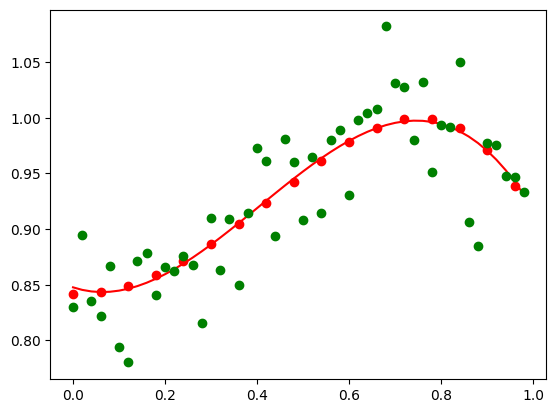

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

def actual_dis():
    x = np.arange(0,1,0.02)
    y = np.sin(x**2 + 1)
    return x,y

def add_noise(y_origin):
    mu = 0
    sigma = 0.04
    noise = np.random.normal(mu, sigma, len(y_origin))
    y_noise = y_origin + noise
    return y_noise

def poly_fitting(x, y, M):
    z = np.polyfit(x, y, M)
    f = np.poly1d(z)
    return f

# generate original data
x_true,y_ture = actual_dis()

# fit on the original data
M1 = 3
f = poly_fitting(x_true, y_ture, M1)
#x_curve = np.linspace(x_true[0], x_true[-1],50)
x_curve = x_true
y_curve = f(x_curve)

# add_noise
y_noise = add_noise(y_curve)
x_noise = x_curve

# show the plot
plt.plot(x_true, y_ture, 'ro',markevery=3)
plt.plot(x_curve, y_curve, 'red')
plt.plot(x_noise, y_noise, 'go')

C:\Users\spica\AppData\Local\Temp\ipykernel_35656\3054236771.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(temp)


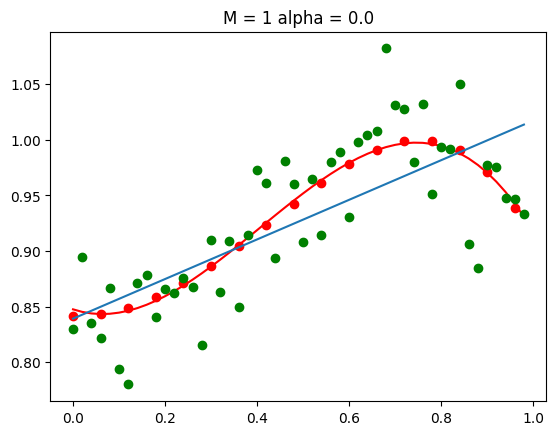

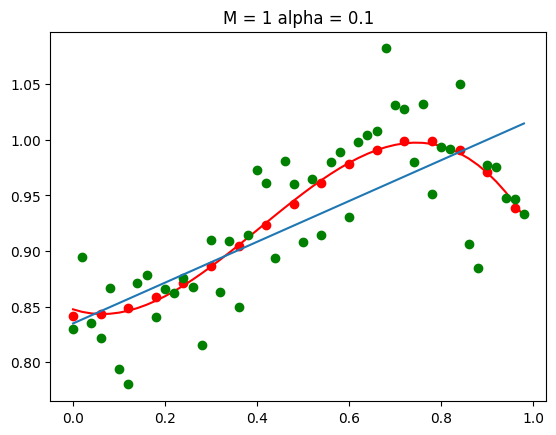

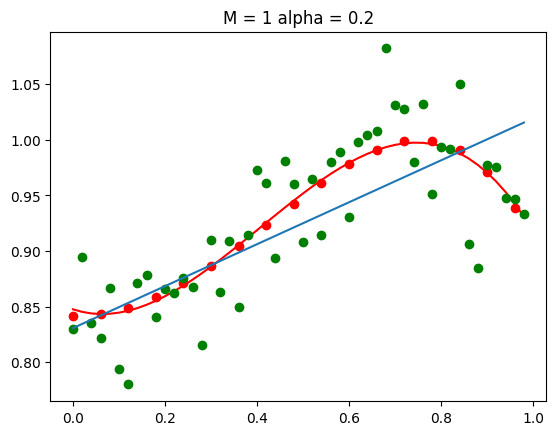

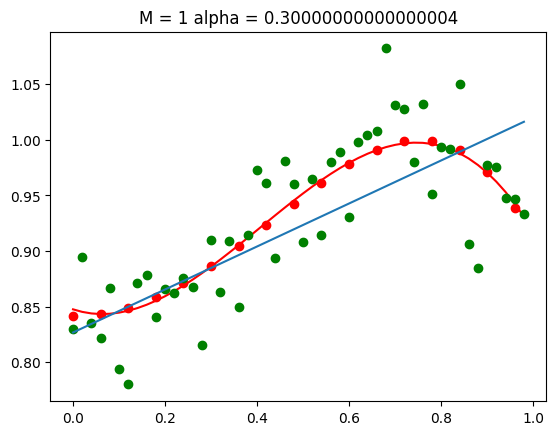

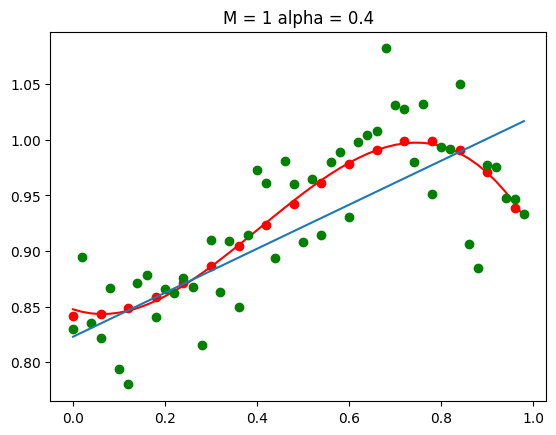

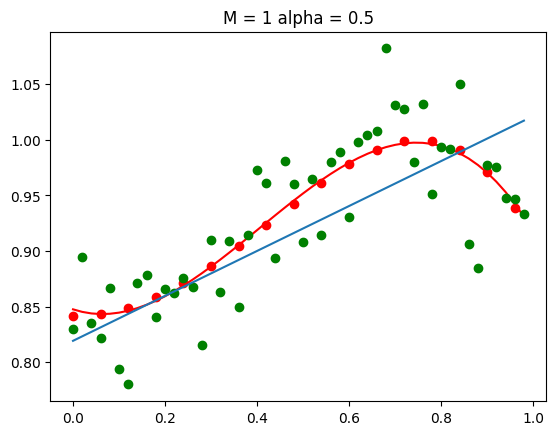

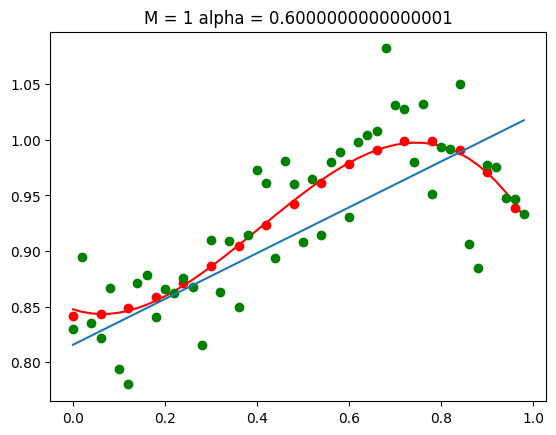

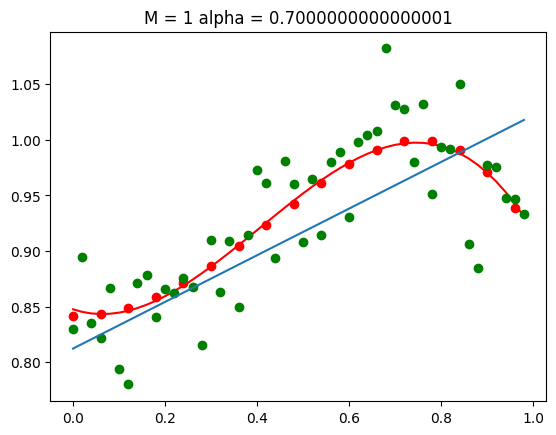

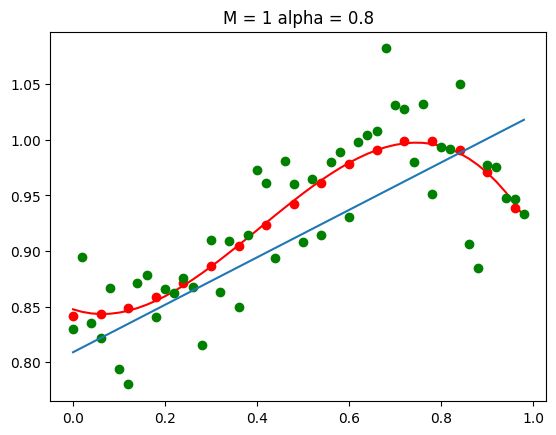

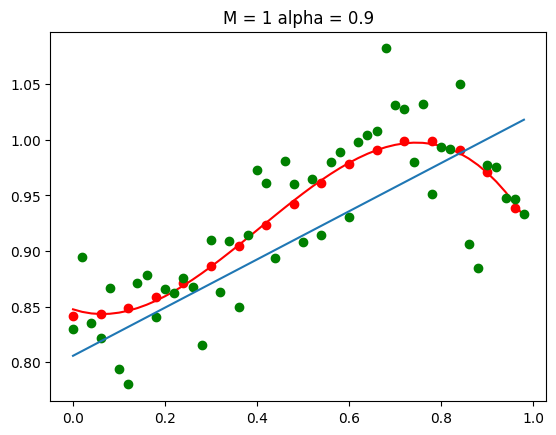

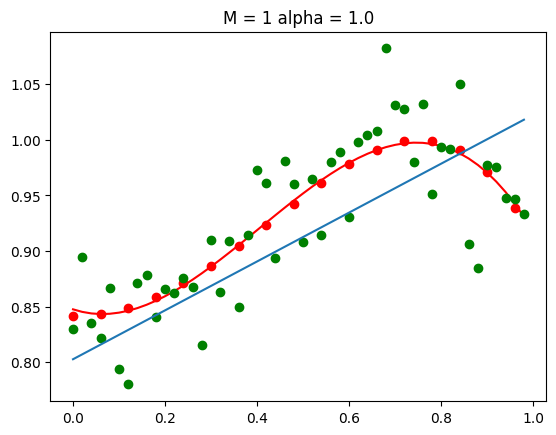

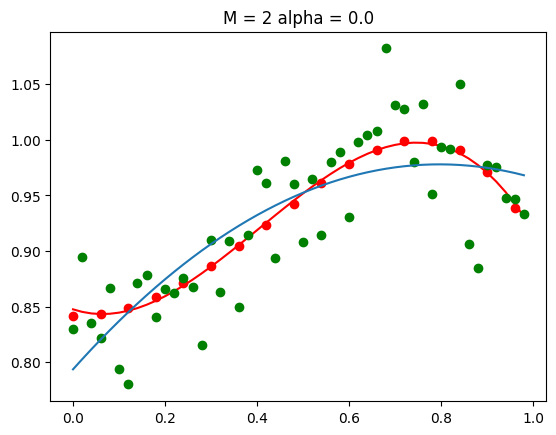

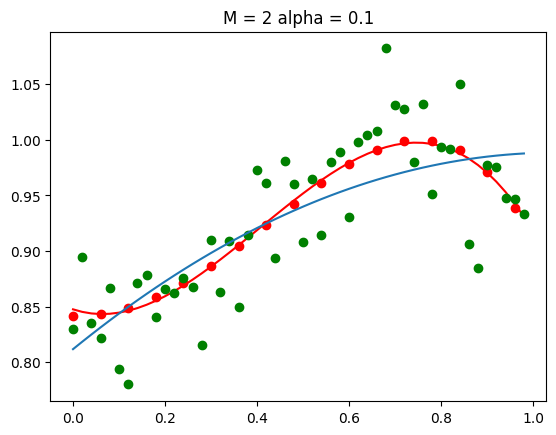

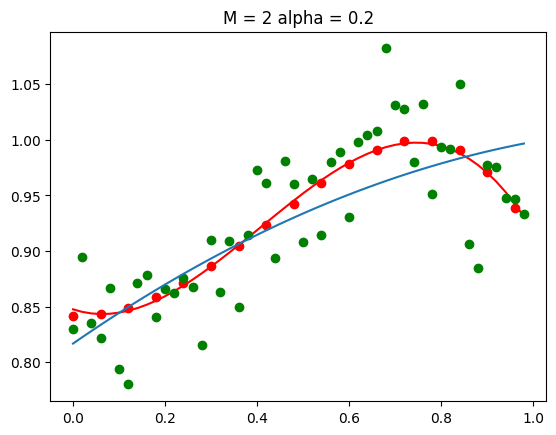

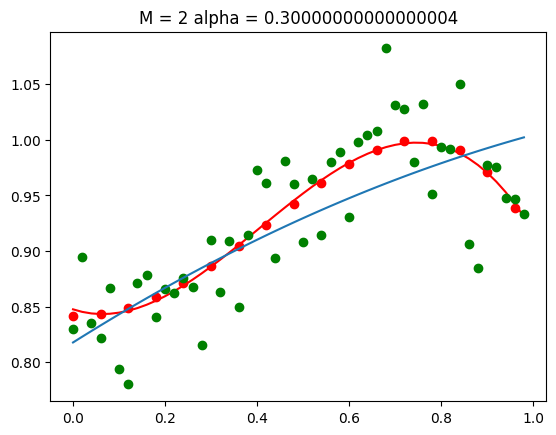

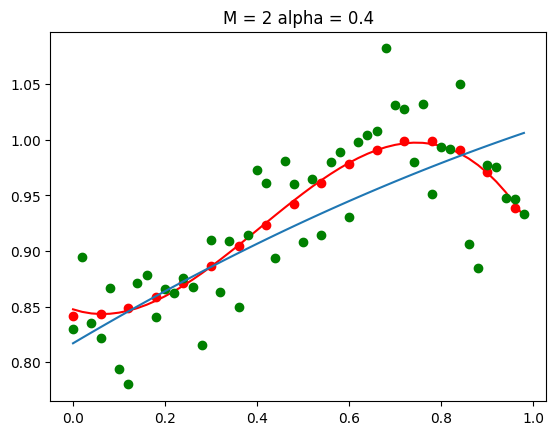

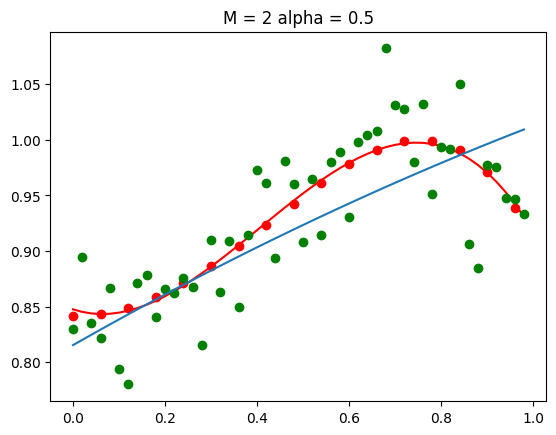

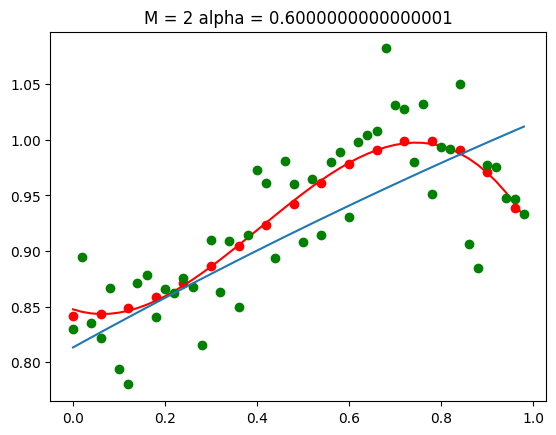

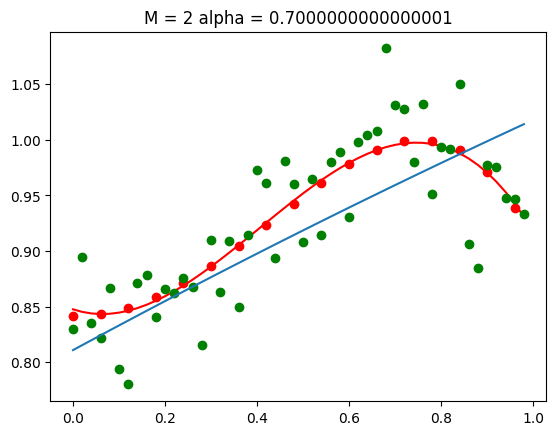

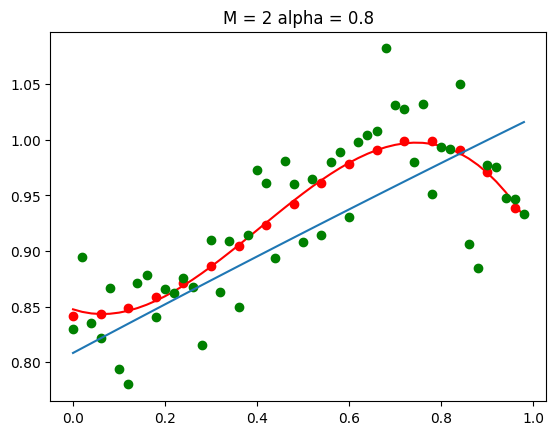

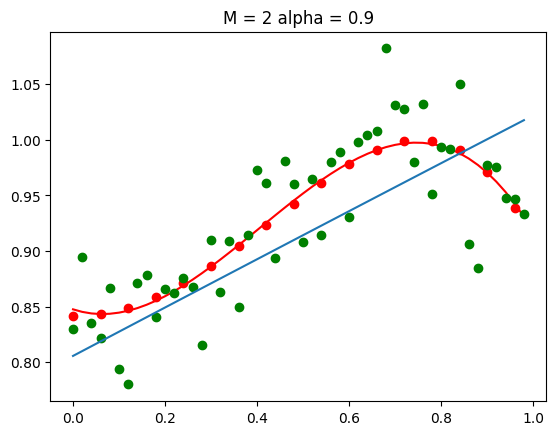

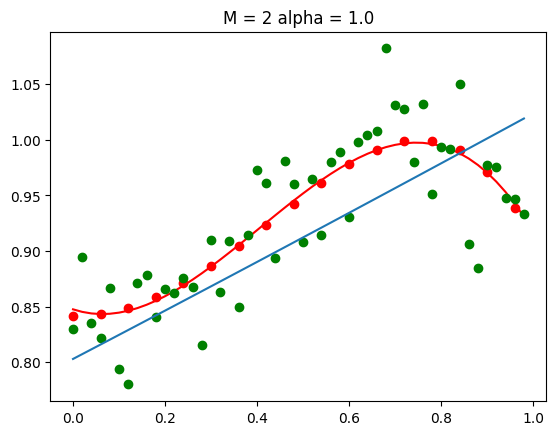

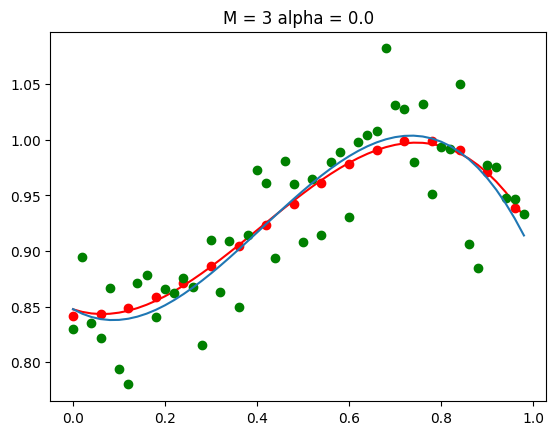

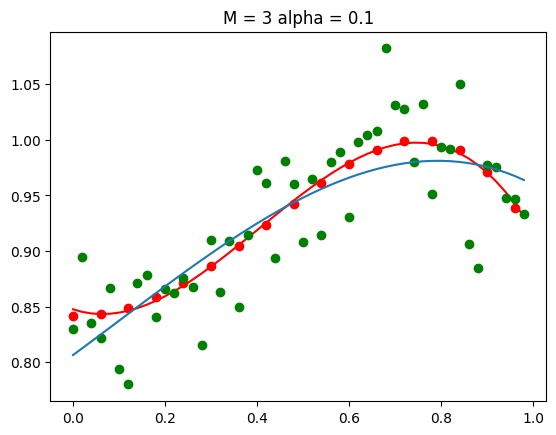

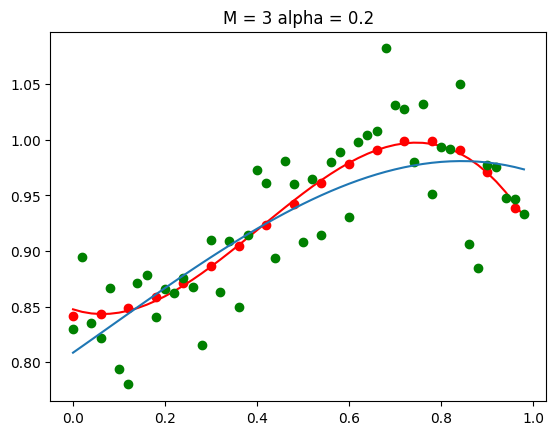

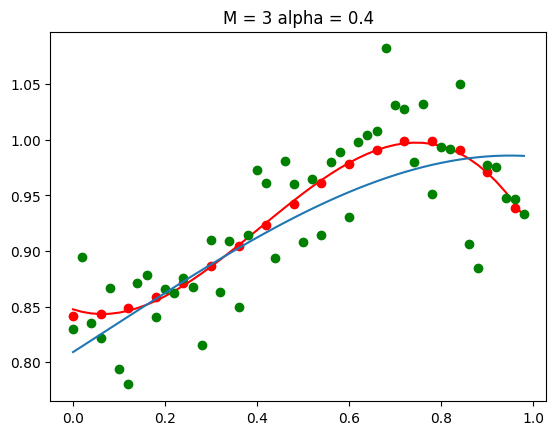

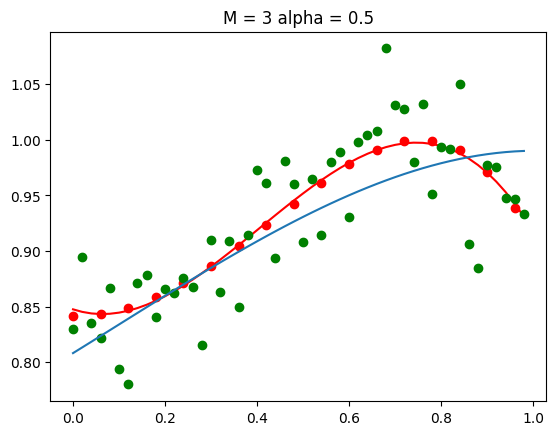

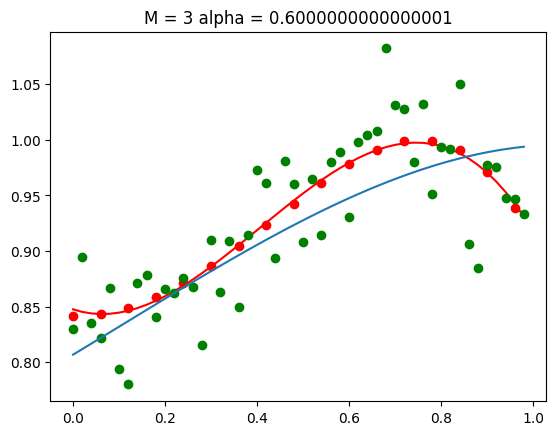

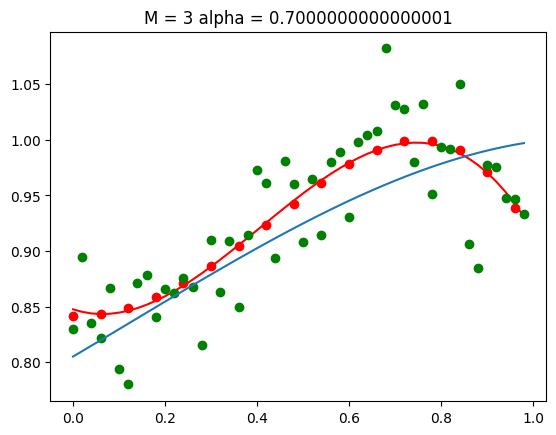

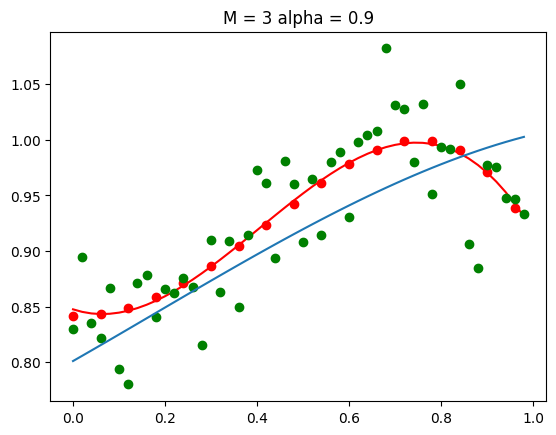

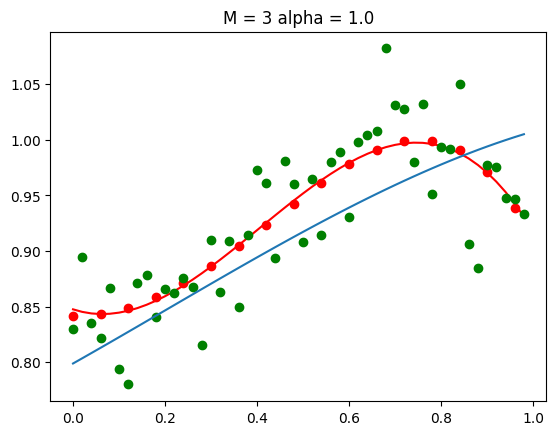

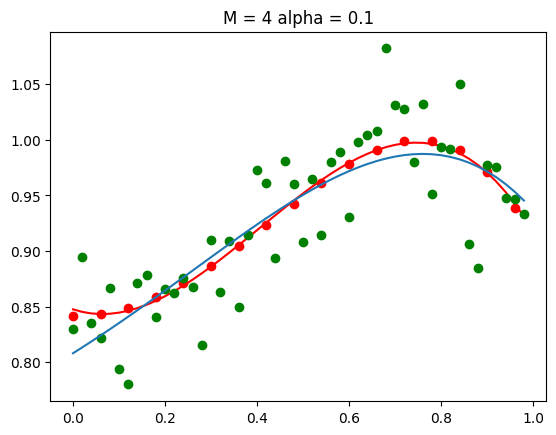

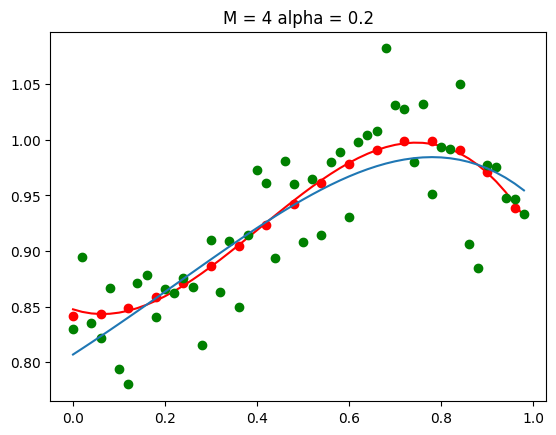

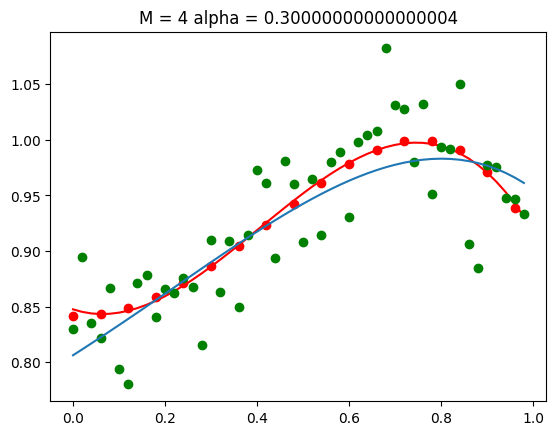

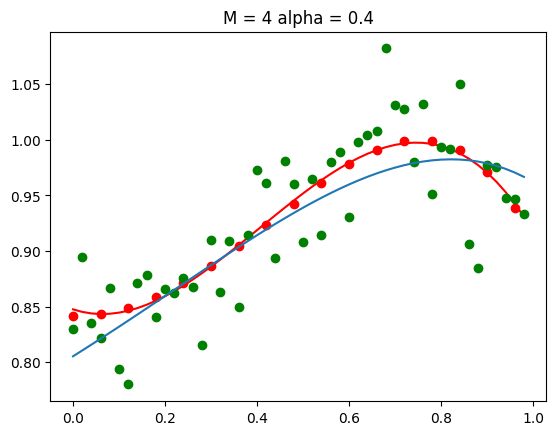

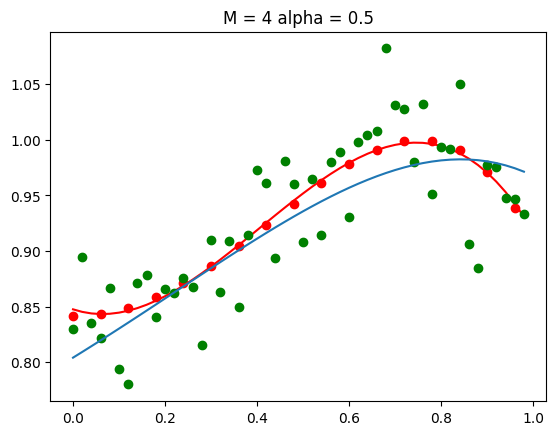

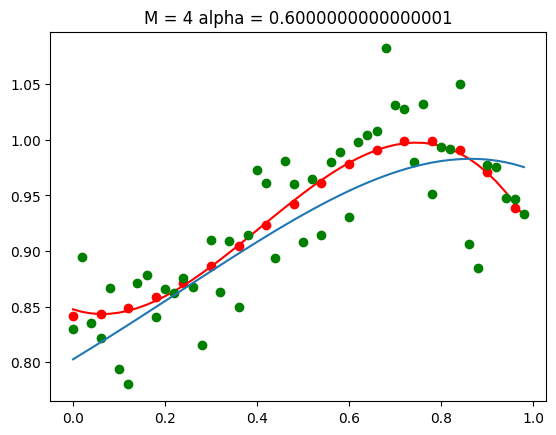

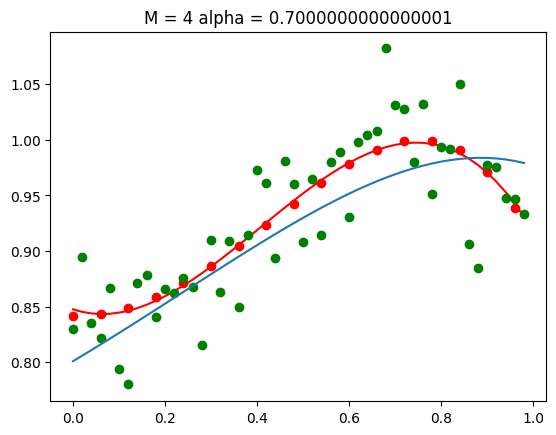

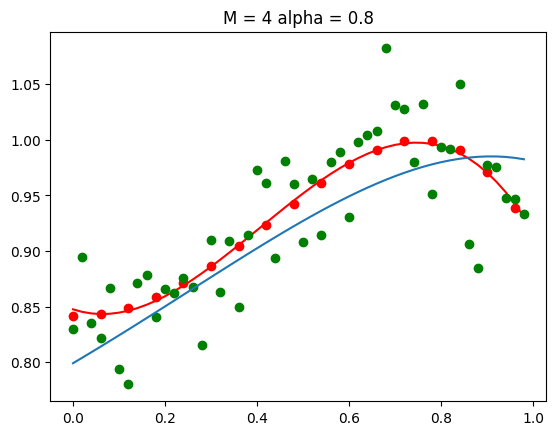

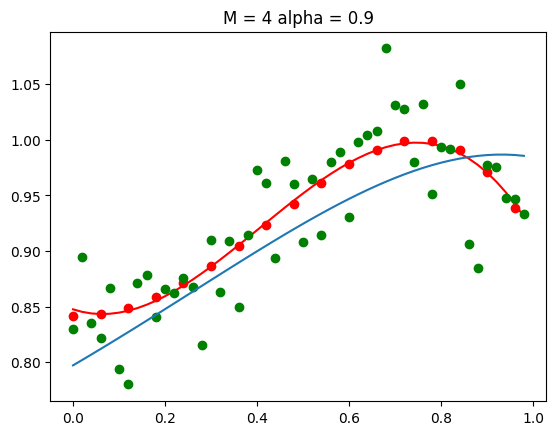

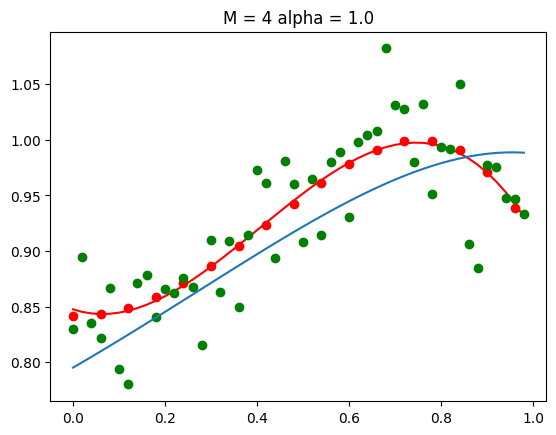

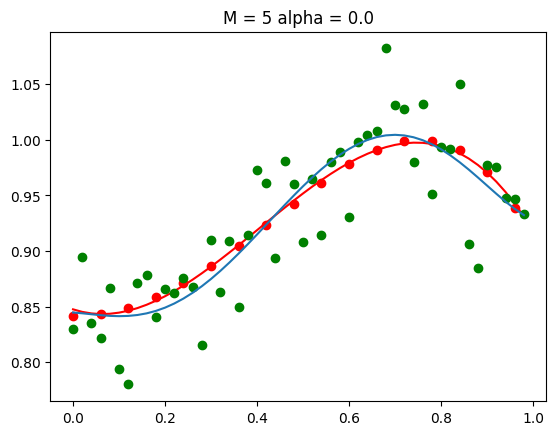

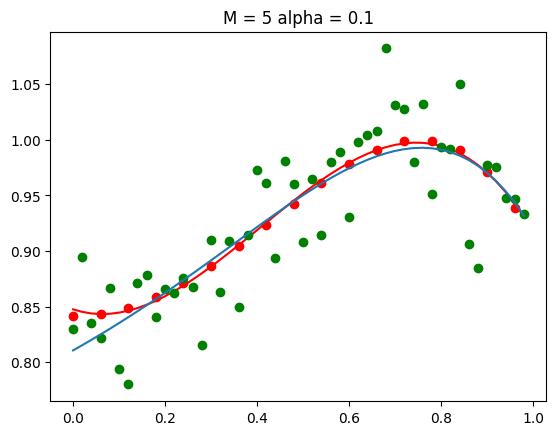

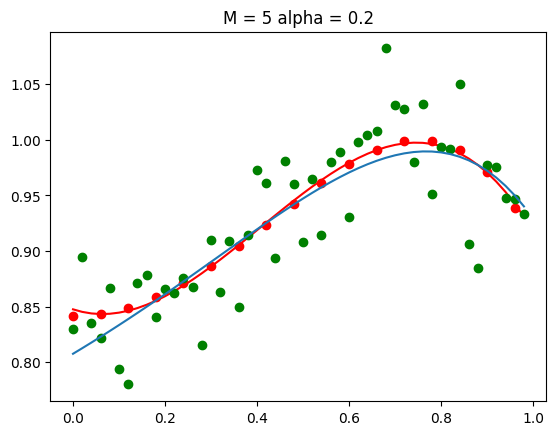

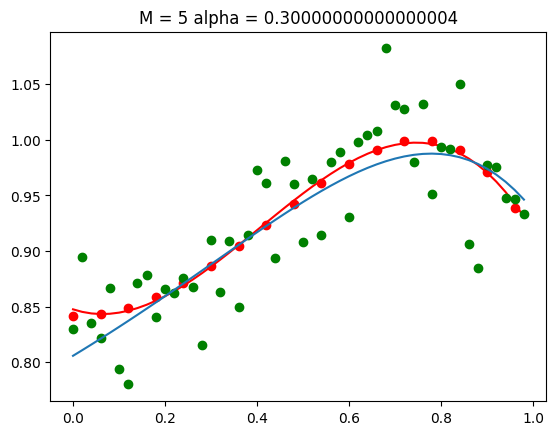

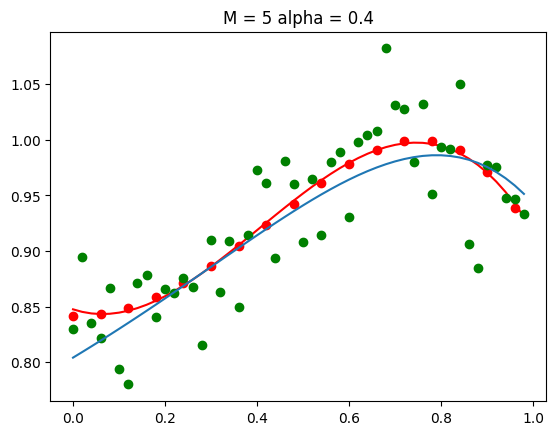

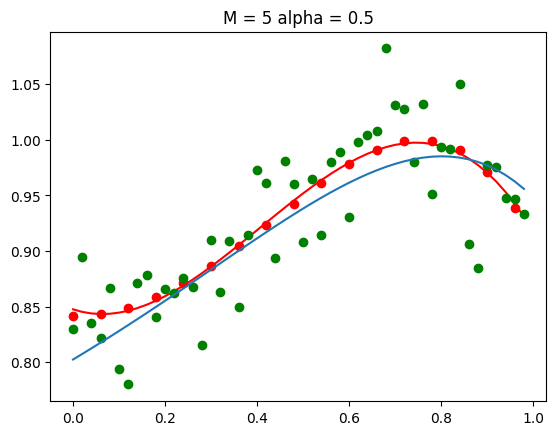

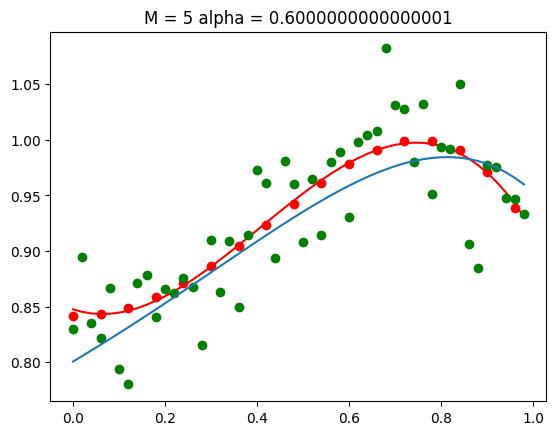

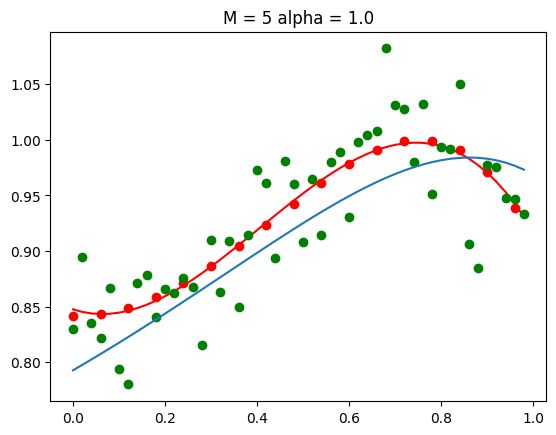

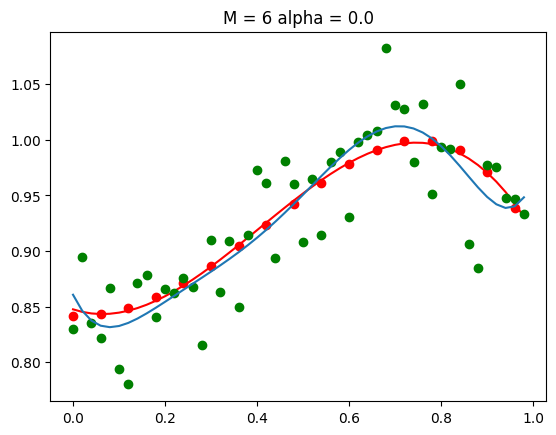

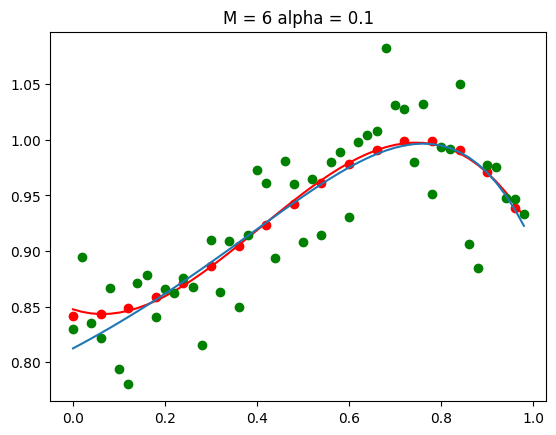

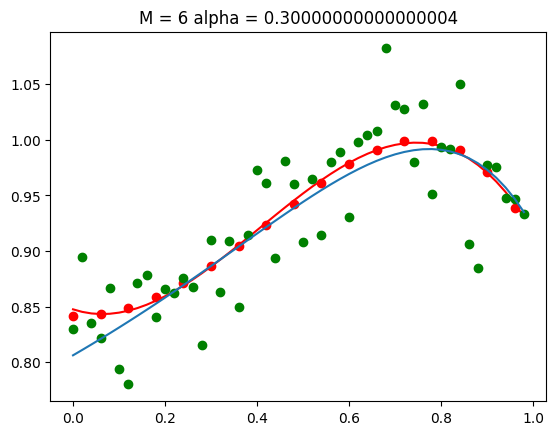

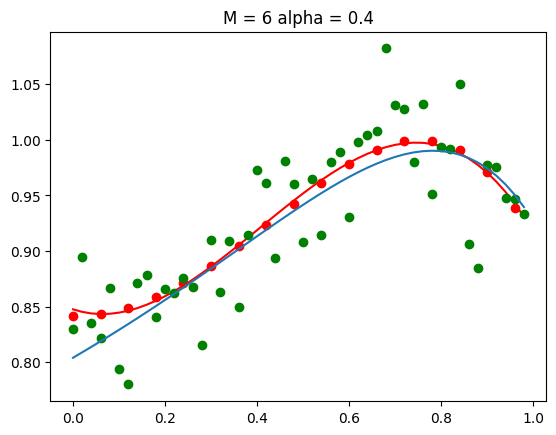

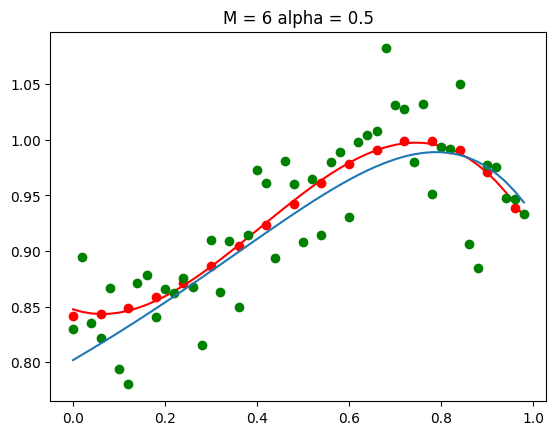

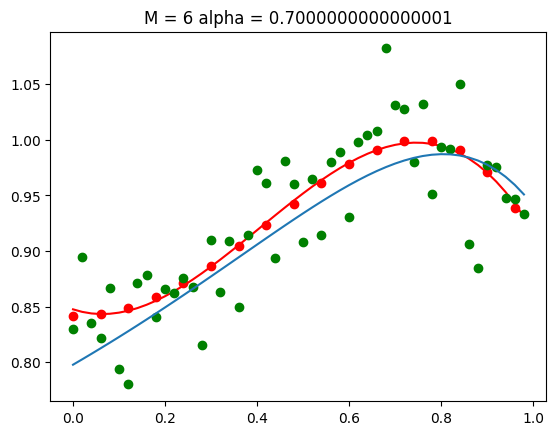

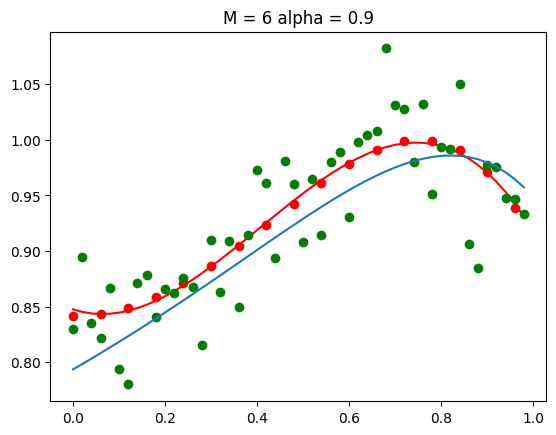

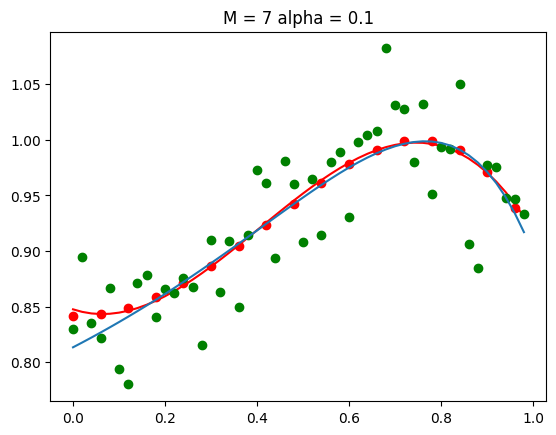

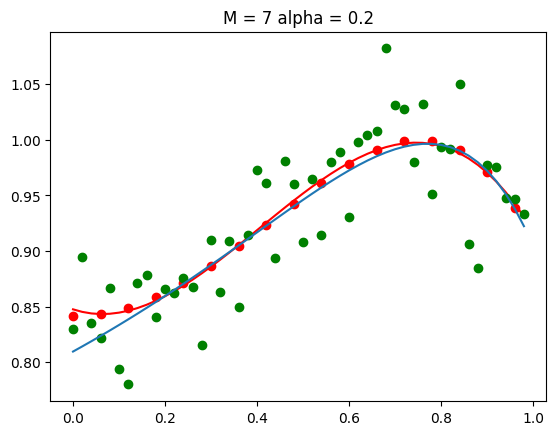

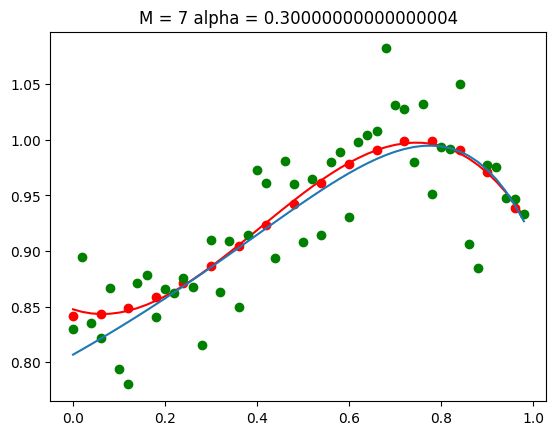

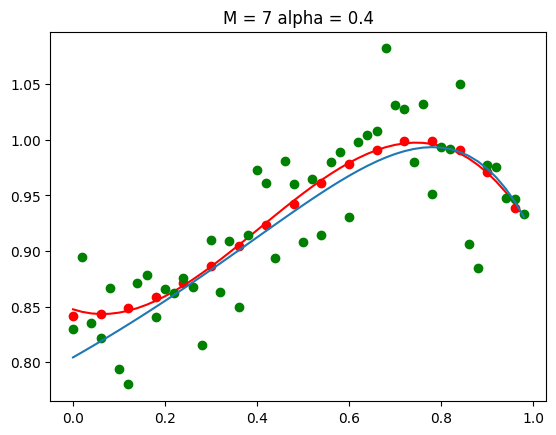

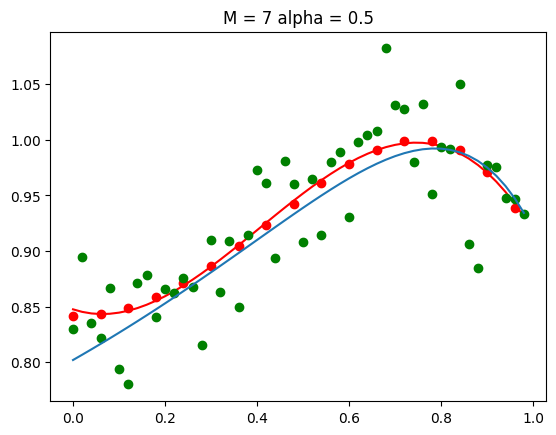

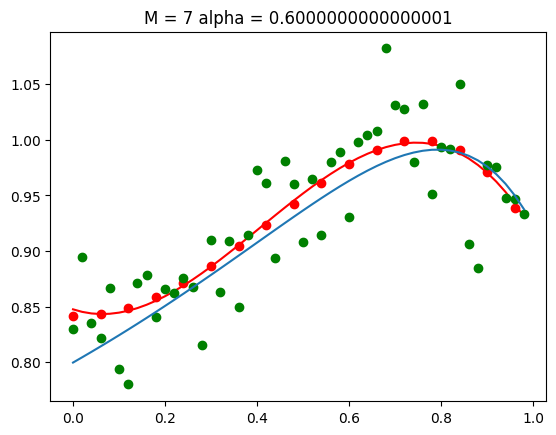

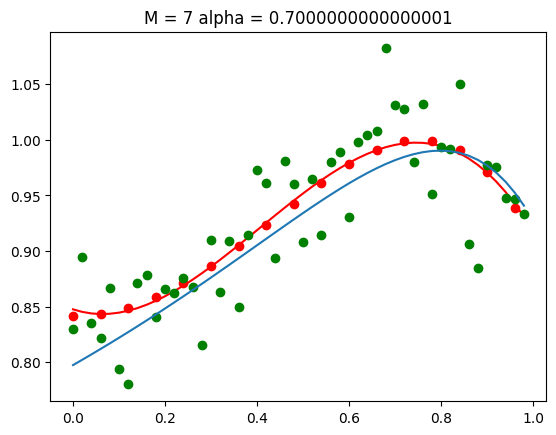

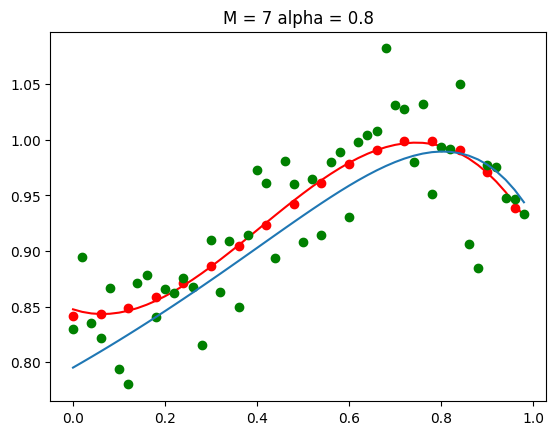

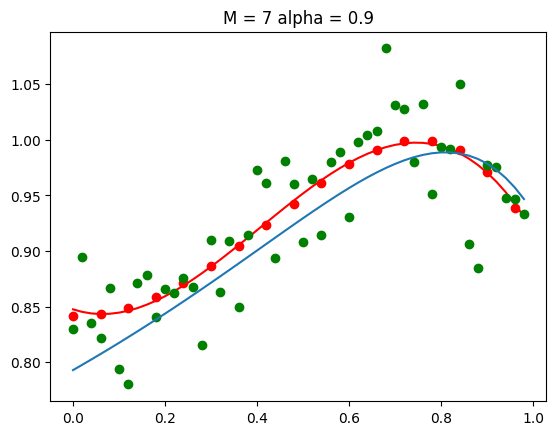

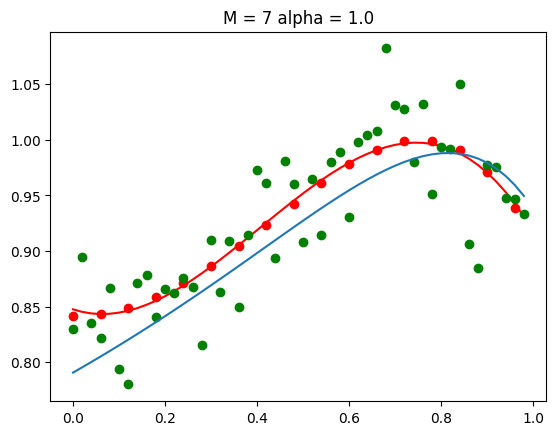

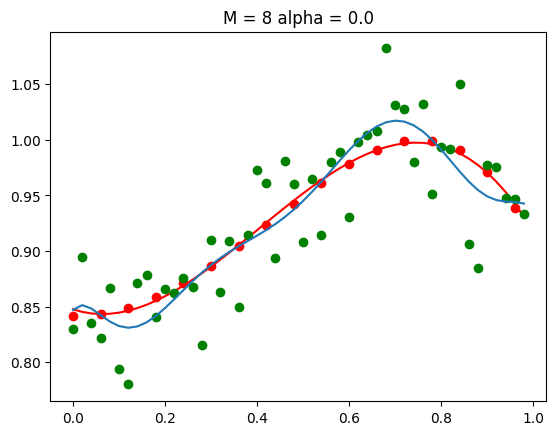

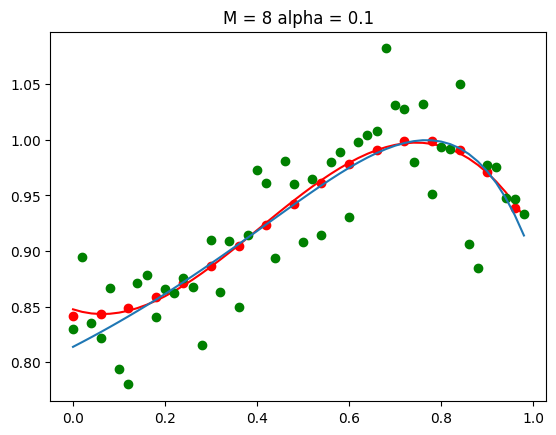

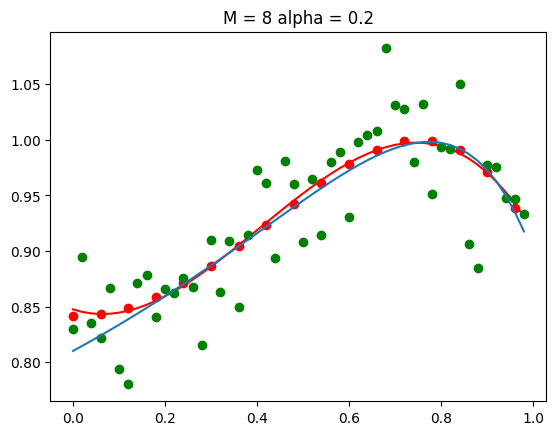

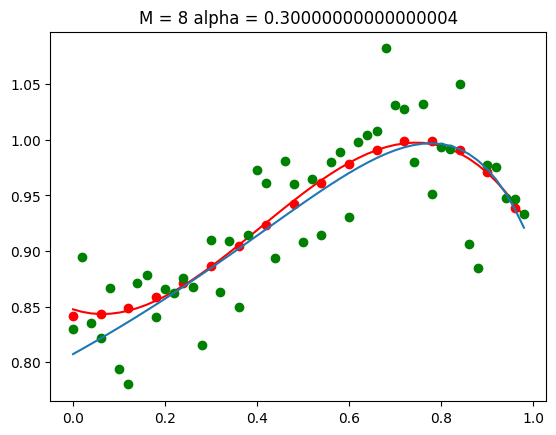

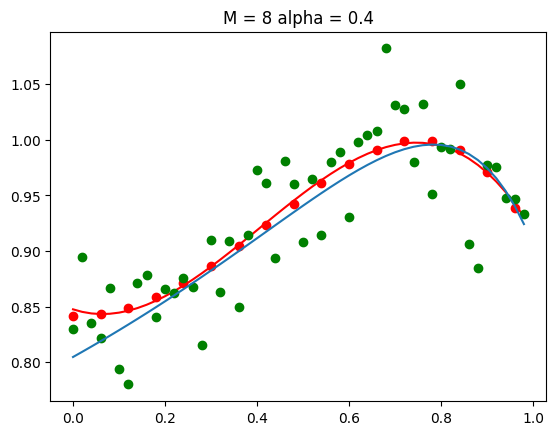

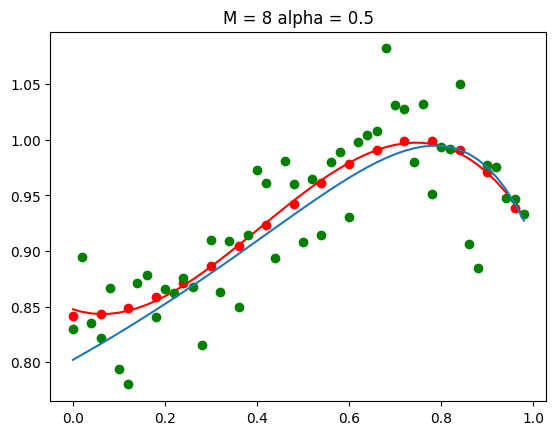

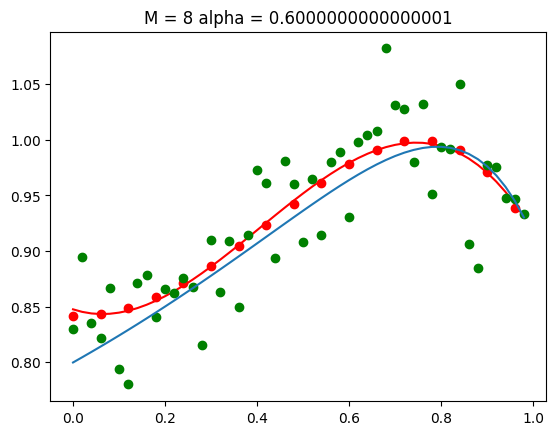

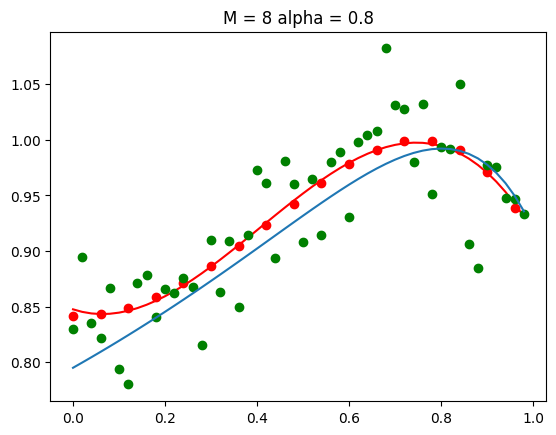

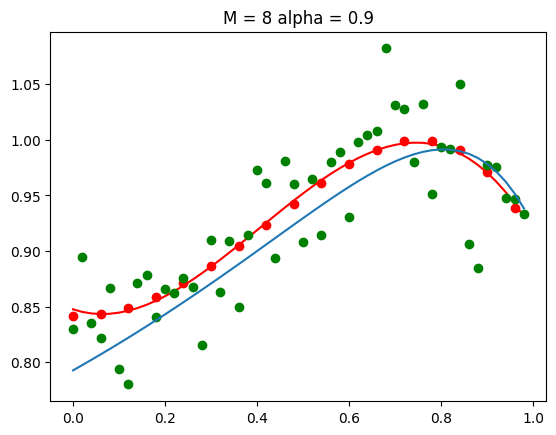

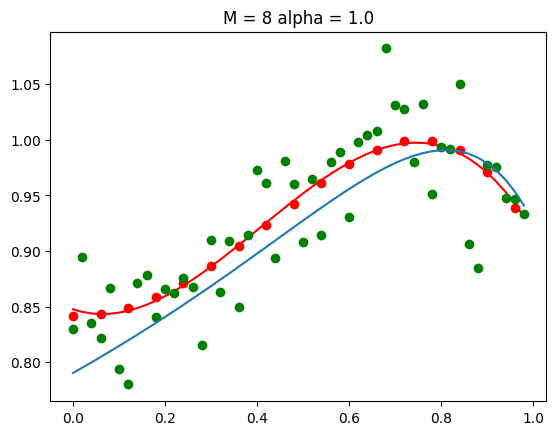

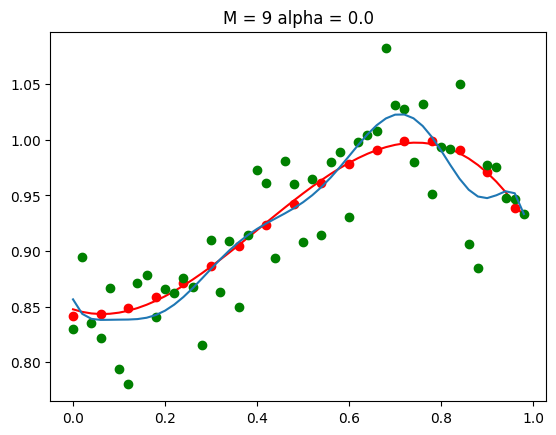

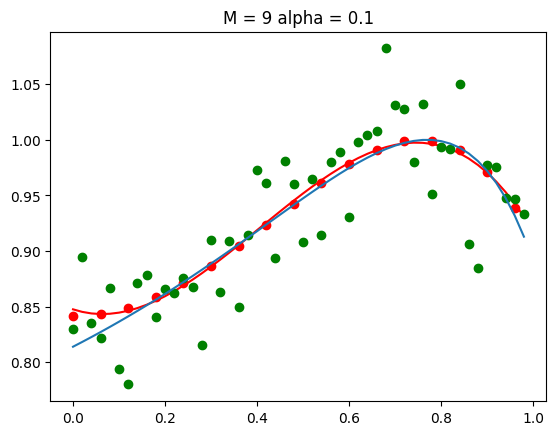

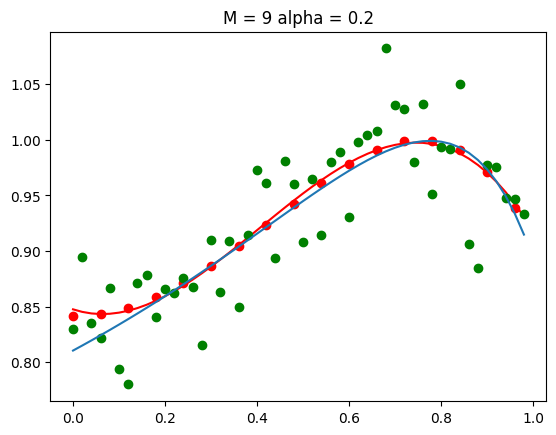

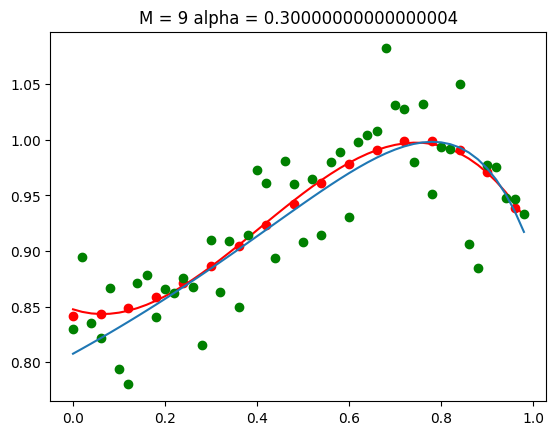

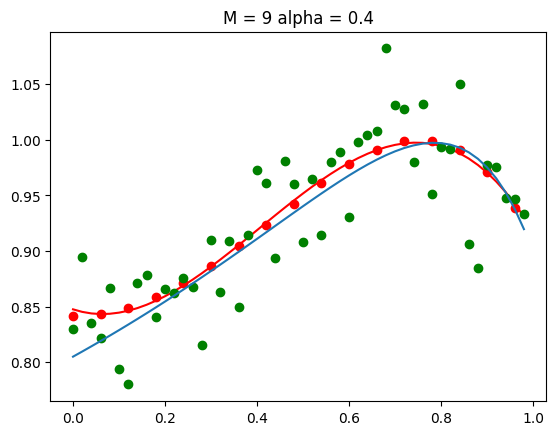

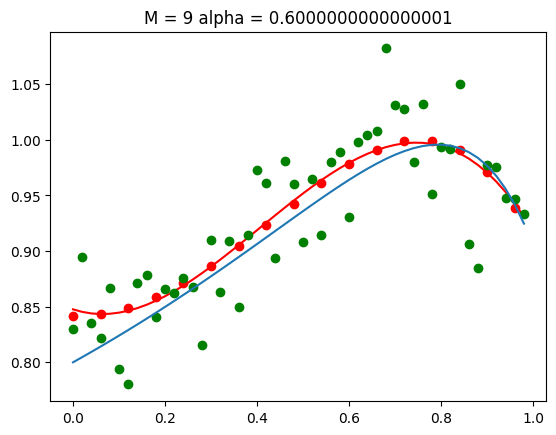

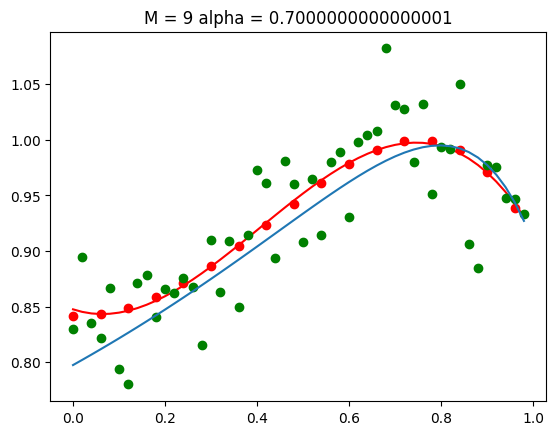

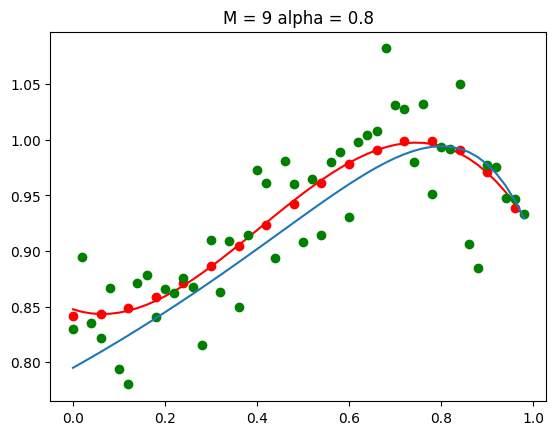

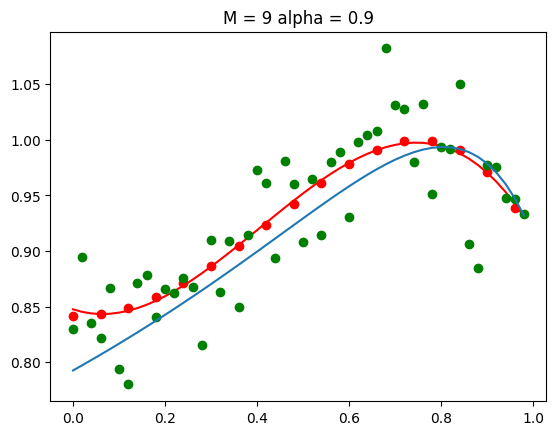

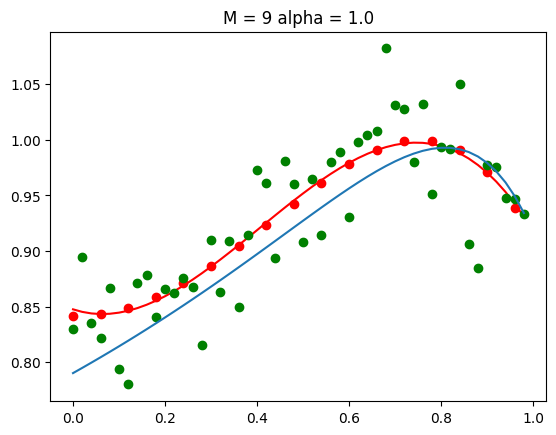

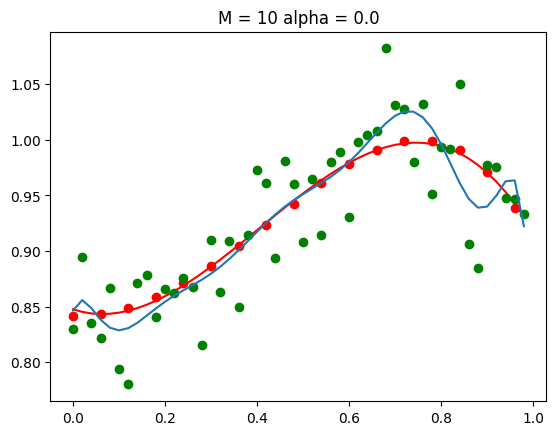

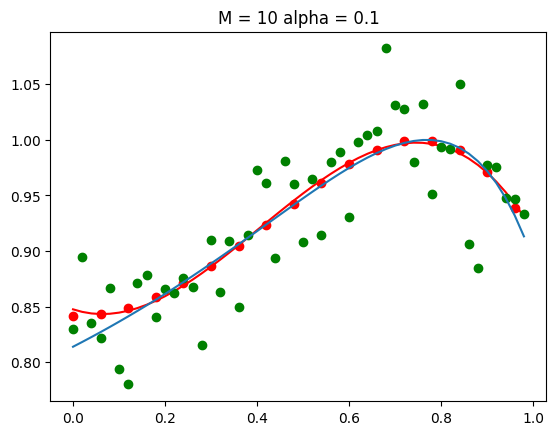

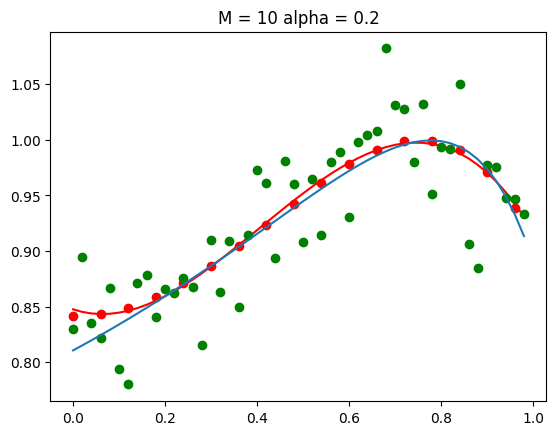

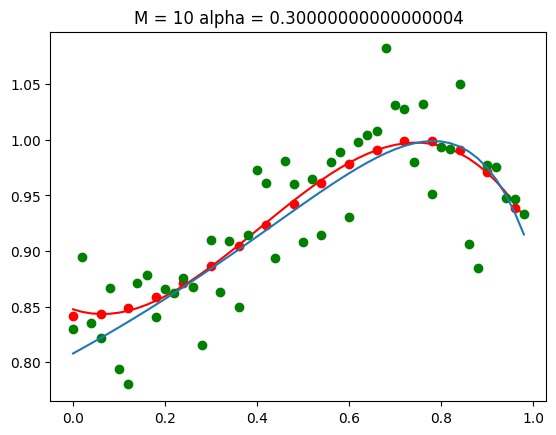

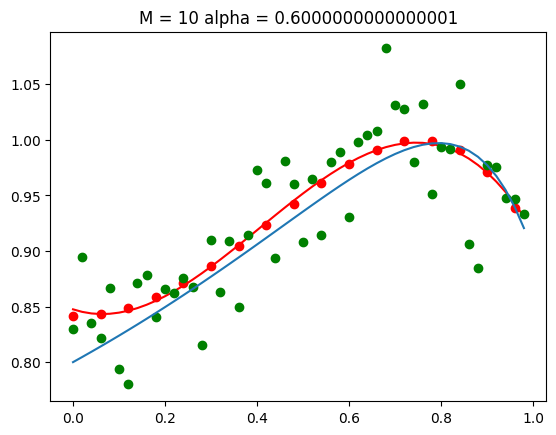

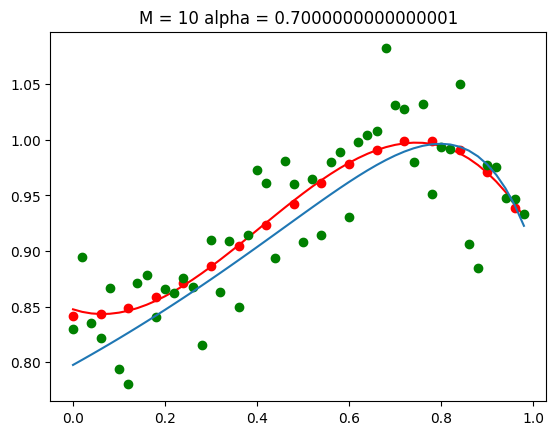

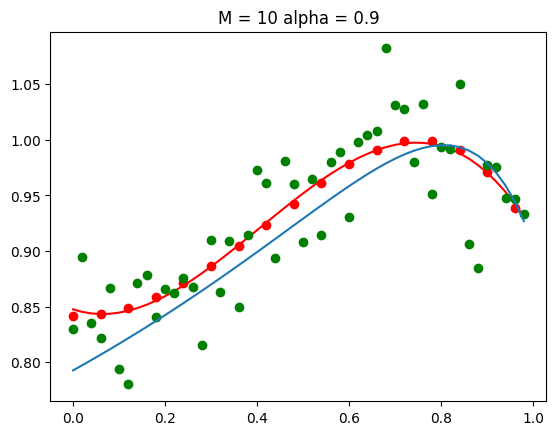

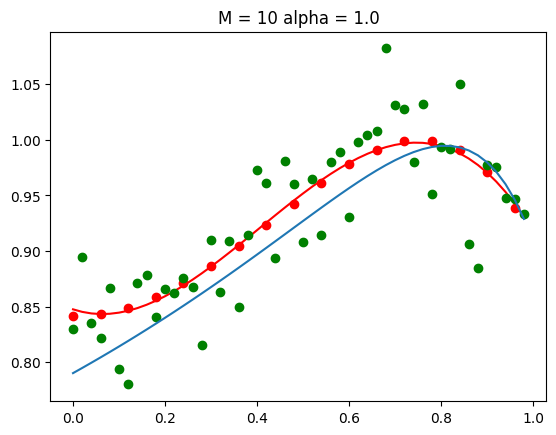

In [33]:
def map_fitting(x,y,M,alpha):
    N = len(x)
    mx = np.zeros([N,M+1])
    vy = np.zeros([N,1])
    ii = np.identity(M+1)
    
    # generate mx and vy vectors
    for n in range(0, N):
        for m in range(0, M+1):
            mx[n][m] = np.power(x[n],m)
        vy[n][0] = y[n]
    
    # optimization
    mxx = np.dot(mx.T,mx)
    mxxo = mxx + alpha*ii
    imxxo = linalg.inv(mxxo)
    tmp = np.dot(imxxo,mx.T)
    w = np.dot(tmp, vy)
    
    return w

def map_plot(x,w):
    M = len(w)-1
    N = len(x)
    
    mx = np.zeros([N,M+1])
    for n in range(0, N):
        for m in range(0, M+1):
            mx[n][m] = np.power(x[n],m)
    y = np.dot(mx,w)
    return x, y

temp=1
for M2 in range(1, 11):
    for alpha in np.arange(0, 1.1, 0.1):
        w = map_fitting(x_noise, y_noise, M2, alpha)
        [x_est, y_est] = map_plot(x_curve, w)
        # plot
        temp = temp+1
        plt.figure(temp)
        plt.title("M = "+str(M2)+" alpha = "+str(alpha))
        plt.plot(x_true, y_ture, 'ro',markevery=3)
        plt.plot(x_curve, y_curve, 'red')
        plt.plot(x_noise, y_noise, 'go')
        plt.plot(x_est, y_est)
        plt.show
            